### A demo of the principal component analysis with the MNIST dataset

#### Developed for the Austin ACM SIGKDD meetup
#### Emma Yu, Feb 8, 2017

### 1. Introduction

We explore PCA with the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits. The dataset contains 70,000 28*28 images, and they are split into a training set of 42,000 images and a testing set of 28,000 images. 

First let's load the dataset and other useful pacakges. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import imshow 
import matplotlib.pyplot as plt
%matplotlib inline

/Users/emmayu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
names = train.keys()
print names

Index([u'label', u'pixel0', u'pixel1', u'pixel2', u'pixel3', u'pixel4',
       u'pixel5', u'pixel6', u'pixel7', u'pixel8',
       ...
       u'pixel774', u'pixel775', u'pixel776', u'pixel777', u'pixel778',
       u'pixel779', u'pixel780', u'pixel781', u'pixel782', u'pixel783'],
      dtype='object', length=785)


The 2D images have already been flatten into 1D. Each row contains 784 pixel values and the true value of the digit in the image (label). Let's separate them, and convert the data into numpy arrays. 

In [9]:
# split the data into labels and images and convert them into numpy arrays 
traindata = pd.DataFrame.as_matrix(train[names[1:]])
trainlabel = pd.Series.as_matrix(train[names[0]])

print 'training data shape', tdata.shape

testdata = pd.DataFrame.as_matrix(test)
print 'testing datashape', testdata.shape

training data shape (42000, 784)
testing datashape (28000, 784)


We plot the first 25 images to have a quick look of the data.

In [12]:
def plotdigits(data, nrow, ncol):    
    fig, ax = plt.subplots(nrow,ncol)
    for i, a in enumerate(ax.flatten()):
        a.imshow(data[i,:].reshape((28,28)))
    plt.show()
    return

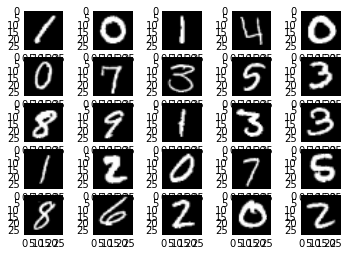

In [13]:
plotdigits(traindata, 5, 5)

In [19]:
# We may want to plot the distribution of pixel values here. 


### 2. Preprosessing

PCA assumes data is centered around zero, so we want to subtract the mean pixel values across all images. We want to make sure we subtract the same values for the training and testing data. Since the pixel values are all in the same range, we do not need to worry about different scales for the variables.  

In [22]:
# subtract the mean image 
meanimage = traindata.mean(axis=0)

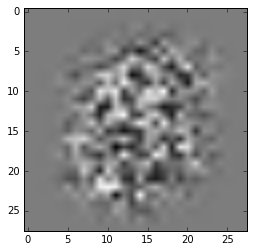

In [23]:
# plot the mean image
plt.imshow(meanimage.reshape((28,28)))
plt.show()


In [24]:
traindata = np.subtract(traindata, meanimage)
testdata = np.subtract(testdata, meanimage)

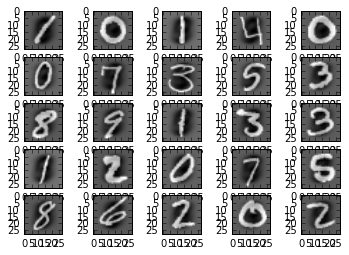

In [25]:
plotdigits(tdata, 5, 5)

### 3. Find the principal components and transfrom data into the principal space

In [16]:
def findeigen(data, ncomp):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=ncomp)
    pca.fit(traintdata)
    #print(pca.explained_variance_ratio_) 
    print 'PCA explained variance = ', sum(pca.explained_variance_ratio_)
    #pca.components_.shape
    
    return pca

In [17]:
def plotpca(pcaname, nrow, ncol):
    # Plot the Eigen digits
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(nrow,ncol)
    for i, a in enumerate(ax.flatten()):
        a.imshow(pcaname.components_[i,:].reshape((28,28)))
    plt.show() 
    return
    

In [18]:
def nearestpredict(pcaname, training, testing, training_label, testing_label, nnearest):
    # transform each entry into the Eigenspace
    etdata = pca.transform(training)
    #print etdata.shape
    # etdata stands for training data in eigen space
   
    # Transform testing samples into eigen space in order to run a K-nearest neighbor classifier
    etestdata=pca.transform(testing)
    #print etestdata.shape
    
    # let's try the nearest neighbor classifier 
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=nnearest)
    neigh.fit(etdata, training_label) 
    
    testpred = neigh.predict(etestdata)
    #print len(testpred)
    
    #testlabel = tlabel[ntest:]
    #print len(testlabel)
    
    from sklearn.metrics import accuracy_score
    print 'accuracy score = ', accuracy_score(testing_label, testpred,normalize=True)
    
    return

In [ ]:
# plot frac of variance explained with numbers of principle components

In [19]:

# Experiments:

# Let's just artificially split the data into two groups
# 30000 training, 12000 testing

ntrain = 10000
ntest = 32000
traintdata = tdata[0:ntrain,:]
testtdata = tdata[ntest:,:]

trainlabel = tlabel[0:ntrain]
testlabel = tlabel[ntest:]



PCA explained variance =  0.763241086193


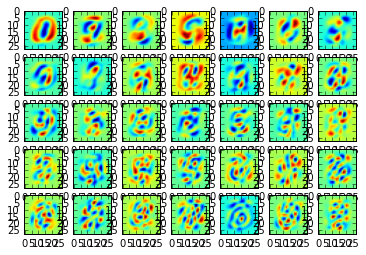

In [22]:
datapca = findeigen(traintdata, 35)
plotpca(datapca, 5, 7)
 

In [148]:
nearestpredict(datapca, traintdata,testtdata, trainlabel,testlabel, 4)
'''
3 - 0.9604
4 - 0.9621
5 - 0.9609
6 - 0.9609
'''

       

accuracy score =  0.9592


'\n3 - 0.9604\n4 - 0.9621\n5- 0.9609\n6- \n'

In [160]:
def nearestpredict2(pcaname, training, testing, training_label, nnearest):
    # transform each entry into the Eigenspace
    etdata = pca.transform(training)
    #print etdata.shape
    # etdata stands for training data in eigen space
   
    # Transform testing samples into eigen space in order to run a K-nearest neighbor classifier
    etestdata=pca.transform(testing)
    #print etestdata.shape
    
    # let's try the nearest neighbor classifier 
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=nnearest)
    neigh.fit(etdata, training_label) 
    
    testpred = neigh.predict(etestdata)
    #print len(testpred)
    
    #testlabel = tlabel[ntest:]
 
    return testpred

In [162]:
# Production code:
datapcareal = findeigen(tdata, 35)

PCA explained variance =  0.763246509325


In [163]:
prediciton = nearestpredict2(datapcareal, tdata,testdata, tlabel, 4)

In [182]:
prediction = pd.Series(prediciton, name = 'Label')
prediction.index += 1 
#prediction = prediction.rename('Label')
prediction.to_csv('prediction.csv',  index_label = 'ImageId', header = True)

In [157]:

'''
- Now we want to transform each entry into the Eigenspace 
- For each testing sample, find the neariest neighbors in the Eigenspace and classify
- Do a grid search for number of eigen vectors to use, and the number of neighbors to use.

Next step:
Blur out the image see if it helps - convolution 
Do it in the Fourier space instead of pixels?
Add some features
'''


'\n- Now we want to transform each entry into the Eigenspace \n- For each testing sample, find the neariest neighbors in the Eigenspace and classify\n- Do a grid search for number of eigen vectors to use, and the number of neighbors to use.\n\nNext step:\nBlur out the image see if it helps - convolution \nDo it in the Fourier space instead of pixels?\nAdd some features\n'

In [158]:
#np.where(testpred - testlabel[0,0:ntest] ==0)

# Let's do 35 for now

# number of Eigen vectors, when nn=5
# 20 - 0.9529
# 25 - 0.958
# 30 - 0.9612
# 35 - 0.9614
# 40 -0.9608
# 50 - 0.960
# 80 - 0.95x



In [52]:
# Train the classifier and test it
from sklearn.neighbors import KNeighborsClassifier
fftneigh = KNeighborsClassifier(n_neighbors=5)
fftneigh.fit(etFFT, tlabel[0,0:ntrain]) 

ffttestpred = fftneigh.predict(etestFFT)
ffttestlabel = mat_contents['testLabels']
#np.where(testpred - testlabel[0,0:ntest] ==0)
from sklearn.metrics import accuracy_score
accuracy_score(ffttestlabel[0,0:ntest], ffttestpred,normalize=True)

# It does not work well? Why?

/Users/emmayu/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.1017